In [2]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Any


In [3]:
# 1. State
# ------------------------------
class ToolState(TypedDict):
    input: str
    result: Any
    next: str  # router's decision

In [ ]:
# 2. Tools (String operations)
# ------------------------------

def uppercase_tool(state: ToolState):
    text = state["input"].replace("upper:", "").strip()
    return {"result": text.upper()}


def reverse_tool(state: ToolState):
    text = state["input"].replace("reverse:", "").strip()
    return {"result": text[::-1]}


def count_tool(state: ToolState):
    text = state["input"].replace("count:", "").strip()
    return {"result": len(text)}


In [5]:
# 3. Router (manual logic)
# ------------------------------
def router(state: ToolState):
    text = state["input"].lower()

    if text.startswith("upper:"):
        return {"next": "uppercase"}
    elif text.startswith("reverse:"):
        return {"next": "reverse"}
    elif text.startswith("count:"):
        return {"next": "count"}
    else:
        return {"next": END}


In [6]:
# 4. Build Graph
# ------------------------------
graph = StateGraph(ToolState)

graph.add_node("router", router)
graph.add_node("uppercase", uppercase_tool)
graph.add_node("reverse", reverse_tool)
graph.add_node("count", count_tool)

graph.set_entry_point("router")

graph.add_conditional_edges(
    "router",
    lambda state: state["next"],
    {
        "uppercase": "uppercase",
        "reverse": "reverse",
        "count": "count",
        END: END
    }
)

graph.add_edge("uppercase", END)
graph.add_edge("reverse", END)
graph.add_edge("count", END)

app = graph.compile()


In [12]:
# 5. Run
# ------------------------------
while True:
    user = input("\nEnter command (upper:, reverse:, count:): ")
    if user.lower() == "exit":
        break
    out = app.invoke({"input": user, "result": None, "next": ""})
    print("Result:", out.get("result"))


Result: JEFISHA


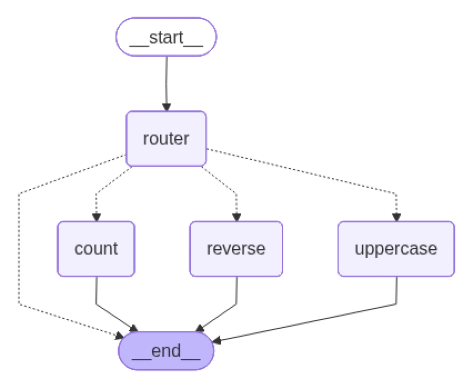

In [11]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# --- Generate PNG Bytes ---
png_bytes = app.get_graph().draw_mermaid_png()

# --- Display Image Below (no saving) ---
img = Image.open(BytesIO(png_bytes))

plt.imshow(img)
plt.axis("off")
plt.show()
